In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000750577"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000750577
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,HANCOCK WHITNEY CORP
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,37.0,3.024595e+01,3.524910e+00,20.54,2.857000e+01,3.074000e+01,3.229000e+01,3.723000e+01
interest income,37.0,1.847193e+08,4.871013e+07,79758000.00,1.727010e+08,1.835060e+08,1.976950e+08,2.762830e+08
net income,38.0,4.095966e+07,2.147855e+07,3839000.00,2.181775e+07,4.066250e+07,4.908975e+07,9.624000e+07
net interest income,37.0,1.656351e+08,4.107860e+07,60753000.00,1.608130e+08,1.718220e+08,1.816910e+08,2.192540e+08
provision for loan losses,37.0,1.369524e+07,1.104951e+07,6154000.00,8.101000e+06,9.718000e+06,1.495100e+07,6.003600e+07
total revenue,6.0,3.144167e+04,2.572706e+03,26490.00,3.143000e+04,3.212000e+04,3.290000e+04,3.356000e+04


# Plots

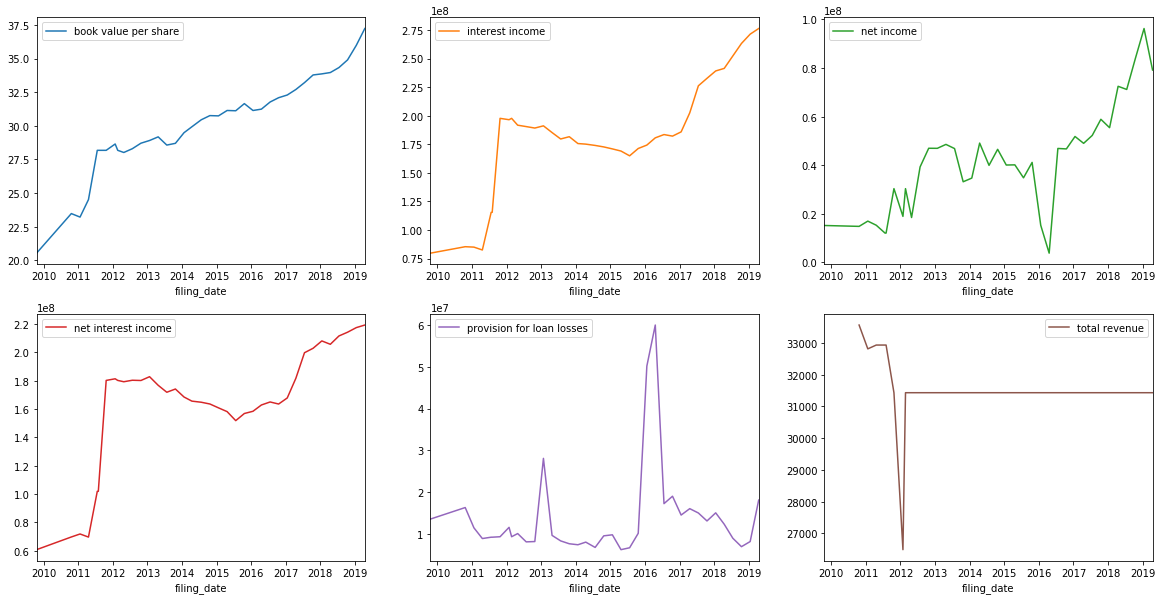

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000750577 book value per share        2009Q4 to 2010Q2: 3 periods  missing   
           interest income             2009Q4 to 2010Q2: 3 periods  missing   
           net income                  2009Q4 to 2010Q2: 3 periods  missing   
           net interest income         2009Q4 to 2010Q2: 3 periods  missing   
           provision for loan losses   2009Q4 to 2010Q2: 3 periods  missing   
           total revenue               2009Q3 to 2010Q2: 4 periods  missing   
           total revenue                                    2011Q2  missing   
           total revenue              2012Q1 to 2019Q1: 29 periods  missing   

                                             message  
cik        item                                       
0000750577 book value per share       Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()